In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
#Import table 1 into a numpy array
X_data = np.array([0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8])
r_data = np.array([0.45, 0.37, 0.3, 0.195, 0.114, 0.079, 0.05]) #mol/m^3-s
FA0 = 0.4 # mol/S

In [12]:
#Calculate FAo/-rA for each value
Y_data = FA0/r_data
print(Y)

[0.88888889 1.08108108 2.05128205 3.50877193 5.06329114 8.        ]


Text(0.5, 1.0, 'Levenspiel Plot')

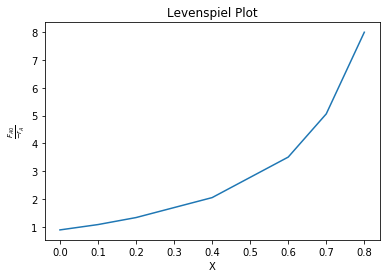

In [18]:
#Generate a Levenspiel plot
plt.plot(X_data,Y_data)
plt.xlabel('X')
plt.ylabel(r'$\frac{F_{A0}}{-r_A}$')
plt.title('Levenspiel Plot')

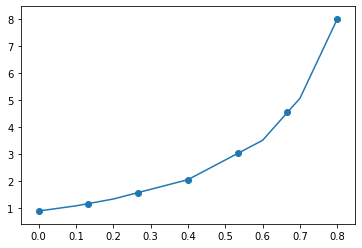

In [25]:
#For both these reactors, we need to interpolate so that we have more data points to work with
#We use the scipy functino interp1d which automatically generates a functinon that returns Y from given X for an input set of data points
from scipy.interpolate import interp1d
f = interp1d(X_data,Y_data)
#Plot the results to check that it's working
x_int = np.linspace(0, 0.8, 7)
plt.plot(X_data,Y_data)
plt.scatter(x_int, f(x_int))


CSTR volume =  2.1052631578947367 m^3


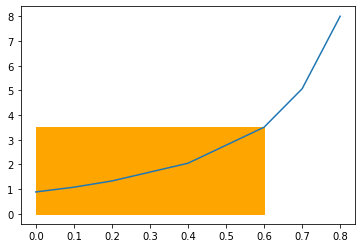

In [33]:
#The CSTR is simply a questino of multiplying X by the corresponding FA0/-rA value
def vol_CSTR(X):
    v = X * f(X)
    #Plot the results
    plt.plot(X_data,Y_data)
    plt.fill_between([0, X],[f(X), f(X)],color='orange')
    return v

X_target = 0.6
print('CSTR volume = ', vol_CSTR(X_target), 'm^3')

PFR volume =  1.114255718367105 m^3


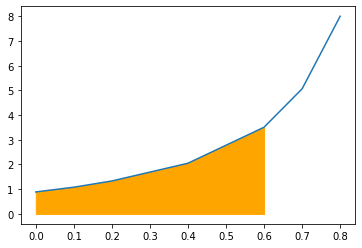

In [37]:
#The PFR requires us to trapz to find the area under the curve for a specific X
#from scipy.integrate import trapz

def vol_PFR(X):
    X_range = np.linspace(0,X,20)
    v = np.trapz(f(X_range),X_range)
    plt.plot(X_data,Y_data)
    plt.fill_between(X_range,f(X_range),color='orange')
    return v

X_target = 0.6
print('PFR volume = ', vol_PFR(X_target), 'm^3')